<a href="https://colab.research.google.com/github/pordeus/tool/blob/main/Estudo_Covid_ufc_ucp_Organizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Classe com Conjunto de Métodos para Sorteio de dados, Classificação e Regressão com diversos algoritmos.** 

In [ ]:
# -*- coding: utf-8 -*-
"""ClasseMultiTeste.ipynb
Classe para auxiliar na execução de testes 
utilizando diversos algoritmos de Machine Learning. 
Nesta primeira versão (18/08/2022) estão disponiveis os recursos:
    - Rodar testes com 16 algoritmos de classificação
    - A classificação pode ser binária ou multiclasse
    - Os resultados incluem as métricas de acurácia, revogaçao (recall), 
    precisão e F1-Score
    - Função para ordenar a saída por uma das métricas
v2 (19/08/2022):
    - Disponibilizado função de regressão.
v3 (25/08/2022)
    - Regressão especifica para dados médicos.
v4 (31/08/2022)
    - Classificação multiclasses
    - sorteio de base de dados para treino e teste gerais
    - sorteio de base de dados para treino e teste médicos,
        considerando mais de um exame por paciente
v5 (30/09/2022)
    - Método para sortear dados para treino, validação e teste
    em GridSearch
v6 (14/10/2022)
    - Calculo da Matriz de Confusão, que fica armazenado numa
    lista para ser utilizada quando desejável.
    - Método para sortear dados para treino, validação e teste
    em GridSearch com segrega;áo de exames por paciente.
    
    
Desenvolvido por Daniel Pordeus Menezes
Disponível em
    https://github.com/pordeus/tool/
"""
import warnings
warnings.filterwarnings('ignore')

#GPU
from numba import jit, cuda

#Apoio
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import random
from typing import Counter
from sklearn import model_selection
#import utils

#Algoritmos classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import ExtraTreeClassifier
#from sklearn.multioutput import ClassifierChain
#from sklearn.multioutput import MultiOutputClassifier
#from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.naive_bayes import BernoulliNB
#from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
#from sklearn.semi_supervised import LabelPropagation
#from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#from sklearn.naive_bayes import MultinomialNB  
#from sklearn.neighbors import NearestCentroid
#from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
#from sklearn.linear_model import SGDClassifier

#algoritmos regressores
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix

#Apoio especifico
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, median_absolute_error#, root_mean_squared_error
from sklearn.metrics import classification_report
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.gaussian_process.kernels import RBF
#from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing

class MultiTeste:

    classificadores = [
        SVC(gamma='auto'),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        LinearSVC(),
        SGDClassifier(max_iter=100, tol=1e-3), 
        KNeighborsClassifier(),
        LogisticRegression(solver='lbfgs'), 
        LogisticRegressionCV(cv=3),
        BaggingClassifier(), 
        ExtraTreesClassifier(n_estimators=300),
        RandomForestClassifier(max_depth=5, n_estimators=300, max_features=1),
        GaussianNB(), 
        DecisionTreeClassifier(max_depth=5),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        OneVsRestClassifier(LinearSVC(random_state=0, dual=False)), #multiclass
        LGBMClassifier(),
        GradientBoostingClassifier(),
        SGDClassifier()
    ]

    regressores = [
        LinearRegression(),
        LGBMRegressor(),
        SGDRegressor(),
        KernelRidge(),
        ElasticNet(),
        BayesianRidge(),
        GradientBoostingRegressor(),
        SVR(),
        MLPRegressor()
    ]
    
    MatrizConf = []

    def __init__(self):#, bancoDados, coluna, divisao_treino, tipoEstudo):
        pass
        #if (tipoEstudo == 'exames'):
        #    self.X_treino, self.X_teste, self.y_treino, self.y_teste = self.sorteiaExames(bancoDados, coluna, divisao_treino)
        #else:
        #    self.X_treino, self.X_teste, self.y_treino, self.y_teste = self.sorteioTreinoTeste(bancoDados, divisao_treino)
            #self.setvalues(X_treino, X_teste, y_treino, y_teste)
        #self.X_treino = preprocessing.normalize(X_treino, norm='l2')
        #self.X_teste = preprocessing.normalize(X_teste, norm='l2')
        #self.y_treino = y_treino
        #self.y_teste = y_teste
        #self.tipoDado = tipoDado
        #if self.tipoDado == 'multiclasse':
        #    self.y_treino = LabelBinarizer().fit_transform(y_treino)
        #    self.y_teste = LabelBinarizer().fit_transform(y_teste)

    def setvalues(self, X_treino, X_teste, y_treino, y_teste):
        self.X_treino = preprocessing.normalize(X_treino, norm='l2')
        self.X_teste = preprocessing.normalize(X_teste, norm='l2')
        self.y_treino = y_treino
        self.y_teste = y_teste

    def Sorteio(self, bancoDados, coluna, divisao_treino, tipoEstudo):
        if (tipoEstudo.lower() == 'exames'):
            self.X_treino, self.X_teste, self.y_treino, self.y_teste = self.sorteiaExames(bancoDados, coluna, divisao_treino)
        else:
            self.X_treino, self.X_teste, self.y_treino, self.y_teste = self.sorteioTreinoTeste(bancoDados, divisao_treino)
        

    ##
    # Função que executa todos os testes de Classificação. 
    # Ao instanciar a classe, informar no parametro
    # tipoDado se é 'binaria' ou 'multiclasse'. Isso fará
    # o tratamento correto do vetor y para o case de multiplas 
    # categorias de classificação. A saída da função é o um dataframe
    # com os resultados.
    ##  
    def Classificador(self):
        seed = 10
        splits = 10
        qtd_modelos = 0
        algoritmos = []
        acuracia = []
        #roc_auc = []
        revogacao = []
        precisao = []
        f1 = []
        resultados = pd.DataFrame(columns=['algoritmo','acurácia', 'revogação', 'precisão', 'f1'])
        metricas_class = ['accuracy', 'recall', 'precision', 'f1']
        
        for modelo in self.classificadores:
            #print(f"Processando {modelo.__class__.__name__}")
            qtd_modelos += 1
            kfold = model_selection.KFold(n_splits=splits, random_state=seed, shuffle=True)
            algoritmos.append(modelo.__class__.__name__)
            qual_metrica = 0
            for metrica in metricas_class:
                cv_results = model_selection.cross_val_score(modelo, self.X_treino, self.y_treino, cv=kfold, scoring=metrica)
                if qual_metrica == 0:
                    acuracia.append(cv_results.mean())
                if qual_metrica == 1:
                    revogacao.append(cv_results.mean())
                if qual_metrica == 2:
                    precisao.append(cv_results.mean())
                if qual_metrica == 3:
                    f1.append(cv_results.mean())
                qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['algoritmo'] = algoritmos
        #resultados['roc_auc'] = roc_auc
        resultados['acurácia'] = acuracia
        resultados['revogação'] = revogacao
        resultados['precisão'] = precisao
        resultados['f1'] = f1
        return resultados
    
    
    # tipoDado = [binary, multiclasse=[weighted, sampled, etc]]
    @jit(target_backend='cuda')
    def ClassificadorMedico(self, tipoDado):
        qtd_modelos = 0
        algoritmos = []
        revogacao = []
        precisao = []
        acuracia = []
        roc = []
        f1 = []
        resultados = pd.DataFrame(columns=['algoritmo', 'revogação', 'precisão', 'f1', 'acurácia', 'roc auc'])
        metricas_class = [recall_score, precision_score, f1_score]
                    
        for modelo in self.classificadores:
            #print(f"Processando {modelo.__class__.__name__}")
            qtd_modelos += 1
            #kfold = model_selection.KFold(n_splits=splits, random_state=seed, shuffle=True)
            algoritmos.append(modelo.__class__.__name__)
            qual_metrica = 0
            for metrica in metricas_class:
                #_, resultado_teste = self.avaliaClassificadorExames(modelo, self.X_treino, self.y_treino, 
                #                                                                   self.X_teste, self.y_teste, metrica)
                modelo.fit(self.X_treino, self.y_treino)
                y_pred_teste = modelo.predict(self.X_teste)
                self.MatrizConf.append([modelo.__class__.__name__, metrica, confusion_matrix(self.y_teste, y_pred_teste)])
                if qual_metrica == 0:
                    revogacao.append(recall_score(self.y_teste, y_pred_teste, average=tipoDado))
                if qual_metrica == 1:
                    precisao.append(precision_score(self.y_teste, y_pred_teste, average=tipoDado))
                if qual_metrica == 2:
                    f1.append(f1_score(self.y_teste, y_pred_teste, average=tipoDado))
                if qual_metrica == 3:
                    acuracia.append(accuracy_score(self.y_teste, y_pred_teste, average=tipoDado))
                if qual_metrica == 4:
                    roc.append(roc_auc_score(self.y_teste, y_pred_teste, average=tipoDado))
                qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['algoritmo'] = algoritmos
        resultados['revogação'] = revogacao
        resultados['precisão'] = precisao
        resultados['f1'] = f1
        resultados['acurácia'] = f1
        resultados['roc auc'] = f1
        return resultados
    
    def ClassificadorMultiClasse(self, classes):
        #qtd_modelos = 0
        for modelo in self.classificadores:
            print(f"Algoritmo {modelo.__class__.__name__}")
            #qtd_modelos += 1
            self.avaliaClassificadorMultiClasse(modelo, self.X_treino, self.y_treino, self.X_teste, self.y_teste, classes)

    def F1_score(self, revocacao, precisao):
        return 2*(revocacao*precisao)/(revocacao+precisao)
    
    def metricasBasicas(self, y_original, y_previsto):
        falsoPositivo = 0
        verdadeiroPositivo = 0
        falsoNegativo = 0
        verdadeiroNegativo = 0
        for x in range(y_original.shape[0]):
            if y_original[x] == 0:
                if y_previsto[x] == 0:
                    verdadeiroNegativo = verdadeiroNegativo + 1
                else:
                    falsoNegativo = falsoNegativo + 1
            if y_original[x] == 1:
                if y_previsto[x] == 1:
                    verdadeiroPositivo = verdadeiroPositivo + 1
                else:
                    falsoPositivo = falsoPositivo + 1
    
        return falsoPositivo, verdadeiroPositivo, falsoNegativo, verdadeiroNegativo

    def formataSaida(self, valor):
        saidaFormatada = "{:.2f}".format(valor*100)
        return saidaFormatada + "%"
    
    ## Avaliador padrão
    def avaliaClassificadorGeral(self, clf, kf, X, y, f_metrica):
        metrica_val = []
        metrica_train = []
        for train, valid in kf.split(X,y):
            x_train = X[train]
            y_train = y[train]
            x_valid = X[valid]
            y_valid = y[valid]
            clf.fit(x_train, y_train)
            y_pred_val = clf.predict(x_valid)
            y_pred_train = clf.predict(x_train)
            metrica_val.append(f_metrica(y_valid, y_pred_val))
            metrica_train.append(f_metrica(y_train, y_pred_train))
        return np.array(metrica_val).mean(), np.array(metrica_train).mean()

    ## Avaliador considerando exames médicos
    # Não há rodadas de cross validation pq não há
    # como garantir a separação correta de exames e pacientes.
    def avaliaClassificadorExames(self, clf, X_treino, y_treino, X_teste, y_teste, f_metrica):
        #metrica_val = []
        #metrica_train = []
        clf.fit(X_treino, y_treino)
        #y_pred_train = clf.predict(X_treino)
        y_pred_val = clf.predict(X_teste)
        metrica_teste = f_metrica(y_teste, y_pred_val)
        #metrica_treino = f_metrica(y_treino, y_pred_train)
        #print(f"Score Treino: {clf.score(X_treino, y_pred_train)}")
        #print(f"Score Teste: {clf.score(X_teste, y_pred_val)}")
        return metrica_teste#metrica_treino, metrica_teste
    
    def avaliaClassificadorMultiClasse(self, clf, X_treino, y_treino, X_teste, y_teste, classes):
        clf.fit(X_treino, y_treino)
        y_pred_val = clf.predict(X_teste)
        #print(classification_report(y_treino, y_pred_train, target_names=classes))
        #print("Teste - Validação")
        print(classification_report(y_teste, y_pred_val, target_names=classes))
        #return metrica_treino, metrica_teste

    def apresentaMetrica(self, nome_metrica, metrica_val, metrica_train, percentual = False):
        c = 100.0 if percentual else 1.0
        print('{} (validação): {}{}'.format(nome_metrica, metrica_val * c, '%' if percentual else ''))
        print('{} (treino): {}{}'.format(nome_metrica, metrica_train * c, '%' if percentual else ''))


    ##
    # Função para ordenar pela métrica a saída da Função Teste. 
    # Não faz sentido ser usada antes desta função.
    # O parametro 'metrica' é uma string e assume os valores
    # 'accuracy', 'recall', 'precision', 'f1', 'MAE', 'MSE' ou 'RMSE'
    ##
    def OrdenaMetrica(self, saida, metrica, descendente):
        self.saida = saida
        ascendente = True
        if (descendente.lower() == "sim"):
            ascendente = False
        return self.saida.sort_values(metrica, ascending=ascendente, ignore_index=True)

    def Regressao(self):
        seed = 10
        splits = 10
        qtd_modelos = 0
        algoritmos = []
        MSE = []
        MAE = []
        RMSE = []
        resultados = pd.DataFrame(columns=['algoritmo','MSE', 'MAE', 'RMSE'])
        metricas_reg = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
        
        for modelo in self.regressores:
            #print(f"Processando {modelo.__class__.__name__}")
            qtd_modelos += 1
            kfold = model_selection.KFold(n_splits=splits, random_state=seed, shuffle=True)
            algoritmos.append(modelo.__class__.__name__)
            qual_metrica = 0
            for metrica in metricas_reg:
                cv_results = model_selection.cross_val_score(modelo, self.X_treino, self.y_treino, cv=kfold, scoring=metrica)
                if qual_metrica == 0:
                    MSE.append(cv_results.mean())
                if qual_metrica == 1:
                    MAE.append(cv_results.mean())
                if qual_metrica == 2:
                    RMSE.append(cv_results.mean())
                qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['algoritmo'] = algoritmos
        resultados['MSE'] = MSE
        resultados['MAE'] = MAE
        resultados['RMSE'] = RMSE
        return resultados

    def RegressaoMedica(self):
        qtd_modelos = 0
        algoritmos = []
        MSE = []
        MAE = []
        #RMSE = []
        R2 = []
        MEDIANA = []
        resultados = pd.DataFrame(columns=['Algoritmo','MSE', 'MAE', 'R2', 'MEDIANA EA'])
        #metricas_reg = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
        metricas_reg = [mean_squared_error, mean_absolute_error, r2_score, median_absolute_error]#,root_mean_squared_error]
        
        for modelo in self.regressores:
            #print(f"Processando {modelo.__class__.__name__}")
            qtd_modelos += 1
            #kfold = model_selection.KFold(n_splits=splits, random_state=seed, shuffle=True)
            algoritmos.append(modelo.__class__.__name__)
            qual_metrica = 0
            for metrica in metricas_reg:
                #print(f"Metrica {metrica}")
                resultado_teste = self.avaliaClassificadorExames(modelo, self.X_treino, self.y_treino, 
                                                                                   self.X_teste, self.y_teste, metrica)
                if qual_metrica == 0:
                    MSE.append(resultado_teste)
                    #RMSE.append(np.sqrt(resultado_teste))
                if qual_metrica == 1:
                    MAE.append(resultado_teste)
                if qual_metrica == 2:
                   R2.append(resultado_teste)
                if qual_metrica == 3:
                   MEDIANA.append(resultado_teste)
                qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['Algoritmo'] = algoritmos
        resultados['MSE'] = MSE
        resultados['MAE'] = MAE
        resultados['R2'] = R2
        resultados['MEDIANA EA'] = MEDIANA
        return resultados
    
    def RegressaoMedicaAlgoritmo(self, modelo):
        algoritmos = []
        MSE = []
        MAE = []
        R2 = []
        MEDIANA = []
        resultados = pd.DataFrame(columns=['Algoritmo','MSE', 'MAE', 'R2', 'MEDIANA EA'])
        #metricas_reg = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
        metricas_reg = [mean_squared_error, mean_absolute_error, r2_score, median_absolute_error]#,root_mean_squared_error]
        
        #print(f"Processando {modelo.__class__.__name__}")
        algoritmos.append(modelo.__class__.__name__)
        qual_metrica = 0
        for metrica in metricas_reg:
            #print(f"Metrica {metrica}")
            resultado_teste = self.avaliaClassificadorExames(modelo, self.X_treino, self.y_treino, 
                                                                               self.X_teste, self.y_teste, metrica)
            if qual_metrica == 0:
                MSE.append(resultado_teste)
                #RMSE.append(np.sqrt(resultado_teste))
            if qual_metrica == 1:
                MAE.append(resultado_teste)
            if qual_metrica == 2:
               R2.append(resultado_teste)
            if qual_metrica == 3:
               MEDIANA.append(resultado_teste)
            qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['Algoritmo'] = algoritmos
        resultados['MSE'] = MSE
        resultados['MAE'] = MAE
        resultados['R2'] = R2
        resultados['MEDIANA EA'] = MEDIANA
        return resultados    
    
    
    ## procedimento de sorteio de exames
    # considera como entrada o dataframe completo. 
    # Deve ser informado o nome da coluna em que se encontram
    # o nome dos pacientes para que o código faça a contagem.
    # O percentual solicitado é a divisão que se deseja entre 
    # treino e teste.
    ##
    def sorteiaExames(self, bancoDados, coluna, percentual_treino):
        Pacientes = Counter(bancoDados[coluna])
        Pacientes_Numpy = np.array(list(Pacientes.items()))
        
        soma_exames = 0
        for x in Pacientes_Numpy:
            soma_exames += int(x[1]) #somo a quantidade de exames de cada paciente
        
        percent = percentual_treino/100 #percentual de exames para treinamento
        qtd_exames_treino = int(round(percent*soma_exames))
        qtd_exames_teste = soma_exames - qtd_exames_treino
        
        dataset_numpy = np.array(bancoDados)
        
        sorteados_teste = 0
        pacientes_teste = []
        while sorteados_teste < qtd_exames_teste:
            sorteado = random.choice(list(Pacientes.items()))
            sorteados_teste += int(sorteado[1])
            Pacientes.pop(sorteado[0])
            for exame in np.where(dataset_numpy == sorteado[0])[0]:
                pacientes_teste.append(dataset_numpy[exame])
        
        #pacientes teste
        pacientes_teste = np.array(pacientes_teste)
        
        #montando conjunto diferença - pacientes treinamento
        pacientes_treinamento = []
        for restante in Pacientes:
            #print(restante)
            for exame in np.where(dataset_numpy == restante)[0]:
                pacientes_treinamento.append(dataset_numpy[exame])
                #pacientes_treinamento.append(exame)
        pacientes_treinamento = np.array(pacientes_treinamento)
        
        pacientes_treinamento = np.array(pacientes_treinamento)
        #pacientes_treinamento.shape
        
        paciente_treino_df = pd.DataFrame(pacientes_treinamento)
        paciente_teste_df = pd.DataFrame(pacientes_teste)
        
        #eliminando coluna dos pacientes, considerando que é a 1a
        paciente_treino_df = paciente_treino_df.drop(0, axis=1)
        paciente_teste_df = paciente_teste_df.drop(0, axis=1)
        
        #montagem dos y's
        cols = paciente_treino_df.shape[1]        
        y_treino = paciente_treino_df[paciente_treino_df.columns[cols-1]]
        y_treino = np.array(y_treino, dtype=int)
        y_teste = paciente_teste_df[paciente_treino_df.columns[cols-1]]
        y_teste = np.array(y_teste, dtype=int)
        
        #eliminando ultima coluna dos X
        paciente_treino_df = paciente_treino_df.drop(cols, axis=1)
        paciente_teste_df = paciente_teste_df.drop(cols, axis=1)
        
        #montagem dos X's
        X_treino = np.array(paciente_treino_df, dtype=float)
        X_teste = np.array(paciente_teste_df, dtype=float)
        return X_treino, X_teste, y_treino, y_teste

    ## procedimento de sorteio padrão para treinamento e teste.
    # Tem como entrada o dataframe completo. 
    # Deve ser informado o nome da coluna em que se encontram
    # É considerado que a coluna Y seja sempre a última do dataset.
    # O percentual solicitado é a divisão que se deseja entre 
    # treino e teste.
    ##
    def sorteioTreinoTeste(self, bancoDados, percentual_treino):
        percent = percentual_treino/100
        base_numpy = np.array(bancoDados)
        qtd_dados = base_numpy.shape[0]
        qtd_dados_treino = int(np.round(qtd_dados*percent))

        embaralhado = np.random.permutation(base_numpy)
        Treino = embaralhado[0:qtd_dados_treino,:]
        Teste = embaralhado[qtd_dados_treino:,:]
        
        coluna = base_numpy.shape[1] - 1
        #X
        X_treino = Treino[:,:coluna]
        X_teste = Teste[:,:coluna]
        
        #Y
        y_treino = Treino[:,coluna] #tb pode ser usado o -1
        y_teste = Teste[:,coluna]

        return X_treino, X_teste, y_treino, y_teste

    ## procedimento de sorteio para treinamento e teste
    # em GRIDSEARCH. Está fixo o valor de 60/20/20 como padrão
    # para a separação do conjunto de dados.
    ##
    def sorteioTreinoValidacaoTeste(self, bancoDados):
        percent_treino = 0.6
        percent_valid = 0.2
        #percent_teste = 0.2
        base_numpy = np.array(bancoDados)
        qtd_dados = base_numpy.shape[0]
        qtd_dados_treino = int(np.round(qtd_dados*percent_treino))
        qtd_dados_valid = int(np.round(qtd_dados*percent_valid))

        embaralhado = np.random.permutation(base_numpy)
        Treino = embaralhado[0:qtd_dados_treino,:]
        Validacao = embaralhado[qtd_dados_treino:qtd_dados_valid,:]
        Teste = embaralhado[qtd_dados_treino+qtd_dados_valid:,:]
        
        coluna = base_numpy.shape[1] - 1
        #X
        X_treino = Treino[:,:coluna]
        X_valid = Validacao[:,:coluna]
        X_teste = Teste[:,:coluna]
        
        #Y
        y_treino = Treino[:,coluna] #tb pode ser usado o -1
        y_valid = Validacao[:,coluna]
        y_teste = Teste[:,coluna]

        return X_treino, X_valid, X_teste, y_treino, y_valid, y_teste


    ## procedimento de sorteio de exames
    # considera como entrada o dataframe completo. 
    # Deve ser informado o nome da coluna em que se encontram
    # o nome dos pacientes para que o código faça a contagem.
    # O percentual solicitado é a divisão que se deseja entre 
    # treino e teste.
    ##
    def sorteiaExamesValidacao(self, bancoDados, coluna):
        Pacientes = Counter(bancoDados[coluna])
        Pacientes_Numpy = np.array(list(Pacientes.items()))
        
        soma_exames = 0
        for x in Pacientes_Numpy:
            soma_exames += int(x[1]) #somo a quantidade de exames de cada paciente
        
        percent = 0.6 #percentual de exames para treinamento
        qtd_exames_treino = int(round(percent*soma_exames))
        qtd_exames_valid = int(round(0.2*soma_exames))
        qtd_exames_teste = soma_exames - qtd_exames_treino - qtd_exames_valid
        
        dataset_numpy = np.array(bancoDados)
        
        sorteados_valid = 0
        pacientes_valid = []
        while sorteados_valid < qtd_exames_valid:
            sorteado = random.choice(list(Pacientes.items()))
            sorteados_valid += int(sorteado[1])
            Pacientes.pop(sorteado[0])
            for exame in np.where(dataset_numpy == sorteado[0])[0]:
                pacientes_valid.append(dataset_numpy[exame])
        
        #pacientes validação
        pacientes_valid = np.array(pacientes_valid)
        
        
        sorteados_teste = 0
        pacientes_teste = []
        while sorteados_teste < qtd_exames_teste:
            sorteado = random.choice(list(Pacientes.items()))
            sorteados_teste += int(sorteado[1])
            Pacientes.pop(sorteado[0])
            for exame in np.where(dataset_numpy == sorteado[0])[0]:
                pacientes_teste.append(dataset_numpy[exame])
        
        #pacientes teste
        pacientes_teste = np.array(pacientes_teste)
        #pacientes_teste.shape
        
        #montando conjunto diferença - pacientes treinamento
        pacientes_treinamento = []
        for restante in Pacientes:
            #print(restante)
            for exame in np.where(dataset_numpy == restante)[0]:
                pacientes_treinamento.append(dataset_numpy[exame])
                #pacientes_treinamento.append(exame)
        pacientes_treinamento = np.array(pacientes_treinamento)
                
        paciente_treino_df = pd.DataFrame(pacientes_treinamento)
        paciente_teste_df = pd.DataFrame(pacientes_teste)
        paciente_valid_df = pd.DataFrame(pacientes_valid)
        
        #eliminando coluna dos pacientes, considerando que é a 1a
        paciente_treino_df = paciente_treino_df.drop(0, axis=1)
        paciente_teste_df = paciente_teste_df.drop(0, axis=1)
        paciente_valid_df = paciente_valid_df.drop(0, axis=1)
        
        #montagem dos y's
        cols = paciente_treino_df.shape[1]        
        y_treino = paciente_treino_df[paciente_treino_df.columns[cols-1]]
        y_treino = np.array(y_treino, dtype=int)
        y_teste = paciente_teste_df[paciente_teste_df.columns[cols-1]]
        y_teste = np.array(y_teste, dtype=int)
        y_valid = paciente_valid_df[paciente_valid_df.columns[cols-1]]
        y_valid = np.array(y_valid, dtype=int)
        
        #eliminando ultima coluna dos X
        paciente_treino_df = paciente_treino_df.drop(cols, axis=1)
        paciente_teste_df = paciente_teste_df.drop(cols, axis=1)
        paciente_valid_df = paciente_valid_df.drop(cols, axis=1)
        
        #conversao dos X's
        X_treino = np.array(paciente_treino_df, dtype=float)
        X_teste = np.array(paciente_teste_df, dtype=float)
        X_valid = np.array(paciente_valid_df, dtype=float)
        return X_treino, X_valid, X_teste, y_treino, y_valid, y_teste
    
    ## procedimento de treinamento onde escolhe-se a janela minima
     # de teste, retira-a da base e executa o treinamento com o restante.
     # Retorna a média da métrica selecionada.
    ##
    def deixaUmFora(self, modelo, bancoDados, qtdRodadas, metrica):
        bancoDados = np.random.permutation(bancoDados)
        #tamJanela = np.ceil(len(bancoDados)/qtdRodadas)
        
        resultado_metrica = 0
        tamanho = len(bancoDados)
        comprimento = tamanho//qtdRodadas
        for i in range(0,tamanho-1, comprimento):
            #print(i)
            teste = bancoDados[i:(i+comprimento)]
            #print(teste)
            auxiliar = np.arange(i,(i+comprimento))
            treino = np.delete(bancoDados, auxiliar,0)
            #print(treino)
            X_treino  = treino[:,1:-1]
            y_treino = treino[:,-1]
            #y_treino = y_treino.reshape(y_treino.shape[0],1)
            X_teste = teste[:,1:-1]
            y_teste = teste[:,-1]
            #print(f"Alvo Y Treino: {utils.multiclass.type_of_target(y_treino)}")
            #y_teste = y_teste.reshape(y_teste.shape[0],1)
            #print(f"Formato Y treino: {type(y_treino)}")
            #print(f"Formato X treino: {type(X_treino)}")
            modelo.fit(X_treino, y_treino)
            previsao = modelo.predict(X_teste)
            resultado_metrica += metrica(y_teste, previsao)

        return resultado_metrica/qtdRodadas

     ## procedimento de treinamento onde escolhe-se a janela minima
     # de teste, retira-a da base e executa o treinamento com o restante.
     # Retorna os vetores para treino e teste.
    ##  
    @jit(target_backend='cuda')
    def deixaUmForaXY(self, bancoDados, qtdRodadas):
        bancoDados = np.random.permutation(bancoDados)
        #tamJanela = np.ceil(len(bancoDados)/qtdRodadas)
        Xs_treino = []
        Xs_teste = []
        ys_treino = []
        ys_teste = []
        tamanho = len(bancoDados)
        comprimento = tamanho//qtdRodadas
        for i in range(0,tamanho-1, comprimento):
            #print(i)
            teste = bancoDados[i:(i+comprimento)]
            #print(teste)
            #auxiliar = np.arange(i,(i+comprimento))
            if (i+comprimento) > len(bancoDados):
                auxiliar = np.arange(i,(i+comprimento-1))
            else:
                auxiliar = np.arange(i,(i+comprimento))
            treino = np.delete(bancoDados, auxiliar,0)
            #print(treino)
            X_treino  = treino[:,1:-1]
            y_treino = treino[:,-1]
            #y_treino = y_treino.reshape(y_treino.shape[0],1)
            X_teste = teste[:,1:-1]
            y_teste = teste[:,-1]
            #y_teste = y_teste.reshape(y_teste.shape[0],1)
            #print(f"Formato Y treino: {type(y_treino)}")
            #print(f"Formato X treino: {type(X_treino)}")
            ys_treino.append(y_treino)
            ys_teste.append(y_teste)
            Xs_teste.append(X_teste)
            Xs_treino.append(X_treino)

        return np.array(Xs_treino, dtype=float), np.array(ys_treino, dtype=int), np.array(Xs_teste, dtype=float), np.array(ys_teste, dtype=int)

# **Parte Principal do Código. Organização das Execuções dos Métodos.**



In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 13 17:54:04 2022

@author: cp37

Código para Teste Covid

"""

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
#from ClasseMultiTeste import MultiTeste

**Carregamento do Dataset**

In [ ]:
## MAIN - Execução
#print("Classificação Binária (1+2 x 3)")
dataset = pd.read_excel("/content/drive/MyDrive/Doutorado/Dataset/Metricas_VFC_Covid_Modificado_bin.xlsx")
coluna = 'PACIENTE'

In [ ]:
MT = MultiTeste()

# **Avaliação dos Dados**

**Correlação entre as Variáveis**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PACIENTE             98 non-null     object 
 1   Pico VLF             98 non-null     float64
 2   Pico LF              98 non-null     float64
 3   Pico HF              98 non-null     float64
 4   Power VLF            98 non-null     float64
 5   Power LF             98 non-null     float64
 6   Power HF             98 non-null     float64
 7   Power NU/LF          98 non-null     float64
 8   Power NU/HF          98 non-null     float64
 9   Power % VLF          98 non-null     float64
 10  Power % LF           98 non-null     float64
 11  Power % HF           98 non-null     float64
 12  LF/HF                98 non-null     float64
 13  Average NN (s)       98 non-null     float64
 14  Stdev NN (s)         98 non-null     float64
 15  Average HR (1/min)   98 non-null     float

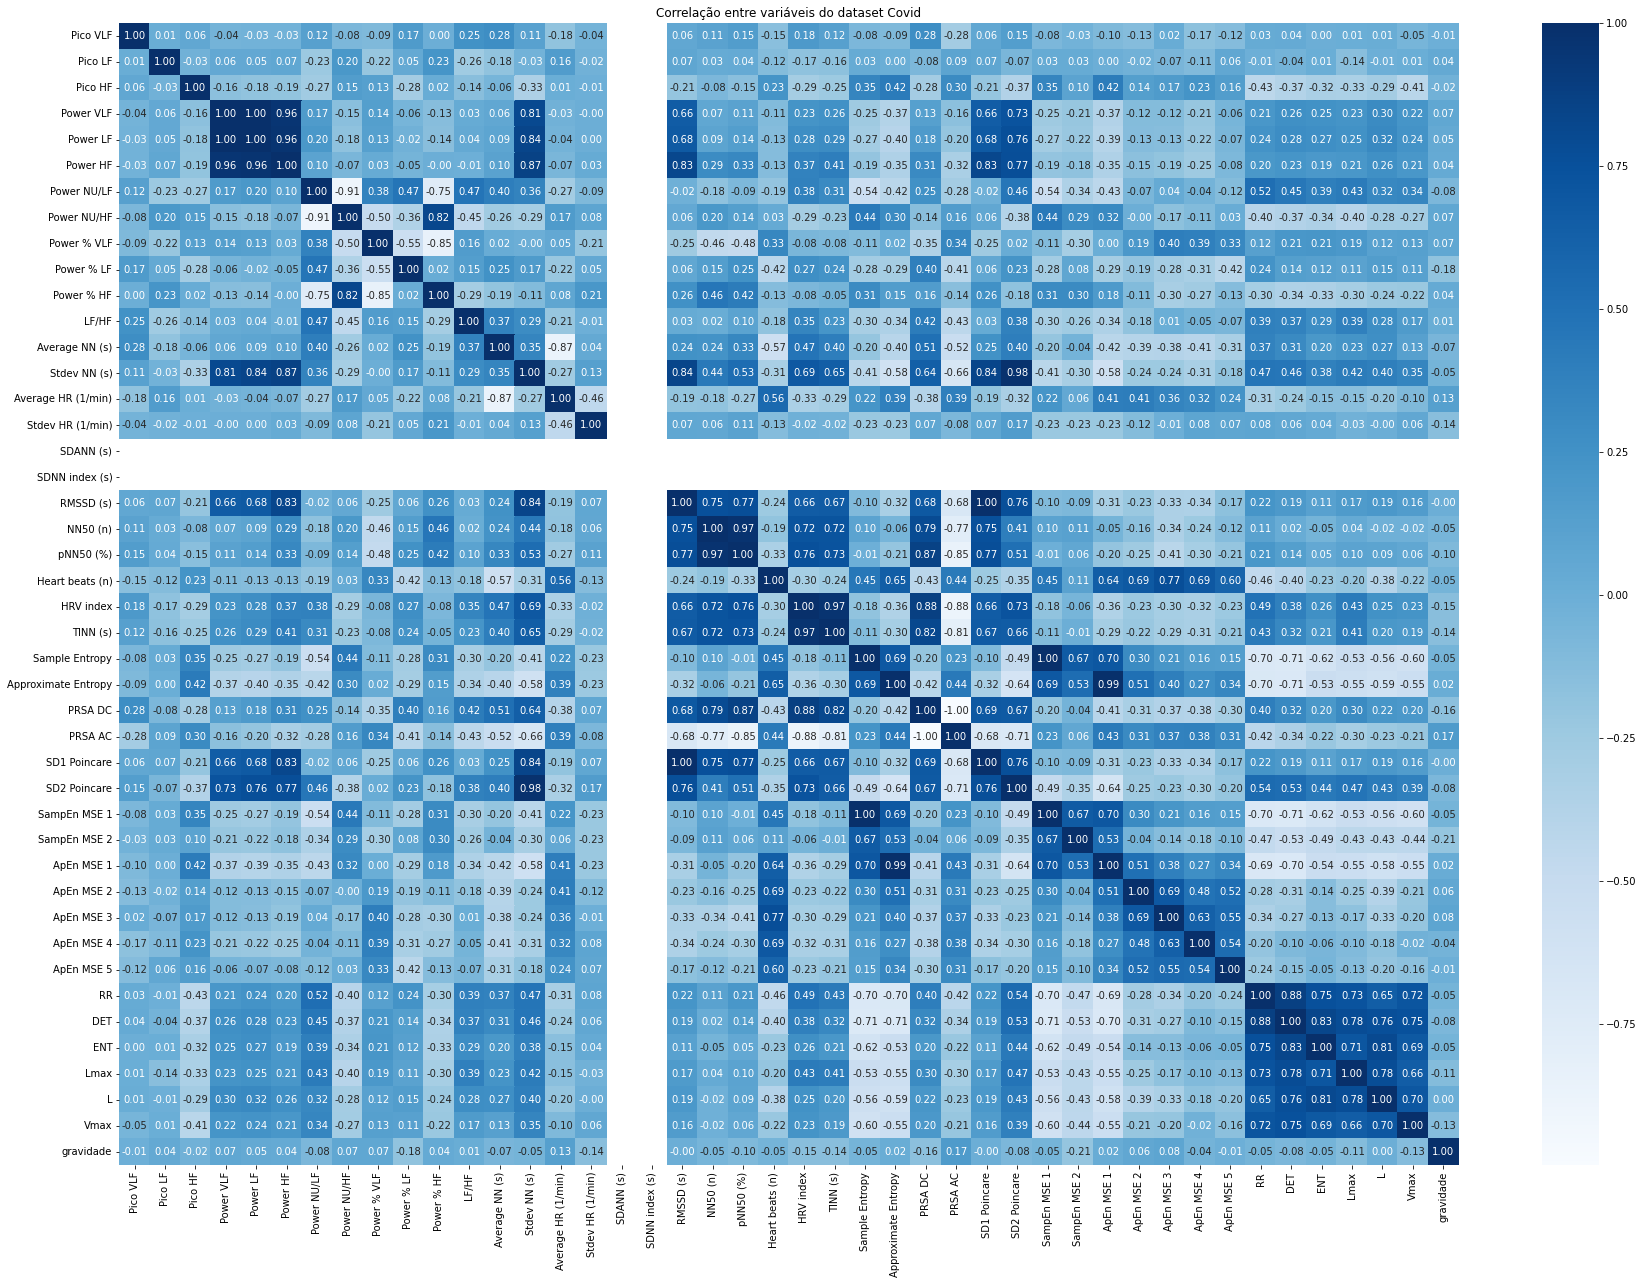

In [ ]:
#análise de correlação
dataset.corr()
dataset.corr().to_excel("matrizCorrelacao.xlsx")
#Mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 21))
sns.heatmap(dataset.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset Covid')
plt.show()


# **Comparação Geral**

**São calculadas as classificações utilizando a separação dos dados em 70-30, 80-20 e 90-10. **

In [ ]:
coluna = 'PACIENTE'

MT70 = MultiTeste()
MT70.Sorteio(dataset, coluna, 70, "exames")

MT80 = MultiTeste()
MT80.Sorteio(dataset, coluna, 80, "exames")

MT90 = MultiTeste()
MT90.Sorteio(dataset, coluna, 90, "exames")


In [ ]:
rodadas = 20
resultado_70 = []
resultado_80 = []
resultado_90 = []
for i in range(rodadas):
    resultado_70.append(MT70.ClassificadorMedico('binary'))
    resultado_80.append(MT80.ClassificadorMedico('binary'))
    resultado_90.append(MT90.ClassificadorMedico('binary'))

KeyboardInterrupt: ignored

In [ ]:
resultado_70 = np.array(resultado_70)
#resultado_final = []
resultado_final_70 = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1', 'revogação', 'precisão', 'roc auc'])
recall = []
precisao = []
f1 = []
acuracia = []
roc = []
algoritmos = []
inicio = time.time()
for k in range(20): #qtd algoritmos
    media_precisao = 0
    media_f1 = 0
    media_recall = 0
    media_acuracia = 0
    media_roc = 0
    for j in range(rodadas):
        media_recall += resultado_70[j,k,1]
        media_precisao += resultado_70[j,k,2]
        media_f1 += resultado_70[j,k,3]
        media_acuracia += resultado_70[j,k,4]
        media_roc += resultado_70[j,k,5]
    algoritmos.append(resultado_70[j,k,0])
    precisao.append(media_precisao/rodadas)
    f1.append(media_f1/rodadas)
    recall.append(media_recall/rodadas)
    acuracia.append(media_acuracia/rodadas)
    roc.append(media_roc/rodadas)
resultado_final_70['algoritmo'] = algoritmos
resultado_final_70['revogação'] = recall
resultado_final_70['precisão'] = precisao
resultado_final_70['f1'] = f1
resultado_final_70['acurácia'] = acuracia
resultado_final_70['roc auc'] = roc

print(f"Tempo decorrido: {(time.time() - inicio)/60:.2f} min")

In [ ]:
resultado_80 = np.array(resultado_80)
#resultado_final = []
resultado_final_80 = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1', 'revogação', 'precisão', 'roc auc'])
recall = []
precisao = []
f1 = []
acuracia = []
roc = []
algoritmos = []
inicio = time.time()
for k in range(20): #qtd algoritmos
    media_precisao = 0
    media_f1 = 0
    media_recall = 0
    media_acuracia = 0
    media_roc = 0
    for j in range(rodadas):
        media_recall += resultado_80[j,k,1]
        media_precisao += resultado_80[j,k,2]
        media_f1 += resultado_80[j,k,3]
        media_acuracia += resultado_80[j,k,4]
        media_roc += resultado_80[j,k,5]
    algoritmos.append(resultado_80[j,k,0])
    precisao.append(media_precisao/rodadas)
    f1.append(media_f1/rodadas)
    recall.append(media_recall/rodadas)
    acuracia.append(media_acuracia/rodadas)
    roc.append(media_roc/rodadas)
resultado_final_80['algoritmo'] = algoritmos
resultado_final_80['revogação'] = recall
resultado_final_80['precisão'] = precisao
resultado_final_80['f1'] = f1
resultado_final_80['acurácia'] = acuracia
resultado_final_80['roc auc'] = roc

print(f"Tempo decorrido: {(time.time() - inicio)/60:.2f} min")

In [ ]:
resultado_90 = np.array(resultado_90)
#resultado_final = []
resultado_final_90 = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1', 'revogação', 'precisão', 'roc auc'])
recall = []
precisao = []
f1 = []
acuracia = []
roc = []
algoritmos = []
inicio = time.time()
for k in range(20): #qtd algoritmos
    media_precisao = 0
    media_f1 = 0
    media_recall = 0
    media_acuracia = 0
    media_roc = 0
    for j in range(rodadas):
        media_recall += resultado_90[j,k,1]
        media_precisao += resultado_90[j,k,2]
        media_f1 += resultado_90[j,k,3]
        media_acuracia += resultado_90[j,k,4]
        media_roc += resultado_90[j,k,5]
    algoritmos.append(resultado_90[j,k,0])
    precisao.append(media_precisao/rodadas)
    f1.append(media_f1/rodadas)
    recall.append(media_recall/rodadas)
    acuracia.append(media_acuracia/rodadas)
    roc.append(media_roc/rodadas)
resultado_final_90['algoritmo'] = algoritmos
resultado_final_90['revogação'] = recall
resultado_final_90['precisão'] = precisao
resultado_final_90['f1'] = f1
resultado_final_90['acurácia'] = acuracia
resultado_final_90['roc auc'] = roc

print(f"Tempo decorrido: {(time.time() - inicio)/60:.2f} min")

In [ ]:
print("Acurácia 70")
ordenada_70 = MT70.OrdenaMetrica(resultado_final_70,'acurácia',"sim")
print(ordenada_70)

In [ ]:
print("Acurácia 80")
ordenada_80 = MT80.OrdenaMetrica(resultado_final_80,'acurácia',"sim")
print(ordenada_80)

In [ ]:
print("Acurácia 90")
ordenada_90 = MT90.OrdenaMetrica(resultado_final_90,'acurácia',"sim")
print(ordenada_90)

In [ ]:
ordenada_70.to_excel("resultado_70.xlsx", "70-30")
ordenada_80.to_excel("resultado_80.xlsx", "80-20")
ordenada_90.to_excel("resultado_90.xlsx", "90-10")

# **Avaliação com LeaveOneOut Geral**

**Como o dataset tem 98 linhas (exames), então foram utilizadas duas janelas, uma com 7 divisões e outra com 14. Em todas as execuções são executadas ambas as janelas e o resultado é calculado através da média.**

In [ ]:
import time
#dataset = pd.read_excel("/content/drive/MyDrive/Dataset_Covid/Metricas_VFC_Covid_Modificado_bin.xlsx")
MT2 = MultiTeste()

In [ ]:
@jit(target_backend='cuda')
def geralGPUdeixaUmFora(bancoDados):
  resultado_final = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1'])
  f1 = []
  acuracia = []
  algoritmos = []
  rodadas_1 = 7
  rodadas_2 = 14
  inicio = time.time()
  for modelo in MT2.classificadores:
    algoritmos.append(modelo.__class__.__name__)
    acur = []
    f1score = []  
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT2.deixaUmForaXY(bancoDados, rodadas_1)       
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT2.deixaUmForaXY(bancoDados, rodadas_2)
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
    acuracia.append(np.mean(acur))
    f1.append(np.mean(f1score))
  resultado_final['algoritmo'] = algoritmos 
  resultado_final['acurácia'] = acuracia
  resultado_final['f1'] = f1
  #print(f"Média de Acurácia para o modelo {modelo.__class__.__name__}= é {np.mean(pontos)}")
  print('Tempo decorrido Total: {:.0f}s'.format((time.time() - inicio)))
  return resultado_final
  

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
res_1fora = geralGPUdeixaUmFora(dataset)

In [ ]:
print("Acurácia")
ordenada = MT2.OrdenaMetrica(res_1fora,'acurácia',"sim")
print(ordenada)

# **Feature Selection**

In [ ]:
X = dataset.iloc[:,1:-1]
y = dataset["gravidade"]

In [ ]:
feature_names = tuple(X.columns)
#feature_names

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import joblib
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
sfs1 = SFS(#SVC(gamma='auto', max_iter=1000),
           QuadraticDiscriminantAnalysis(),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs1 = sfs1.fit(X, y)#,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.1s finished

[2022-11-18 19:39:40] Features: 42/1 -- score: 0.7857142857142857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.1s finished

[2022-11-18 19:39:40] Features: 41/1 -- score: 0.8061224489795918[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.1s finished

[2022-11-18 19:39:40] Features: 40/1 -- score: 0.9081632653061225[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

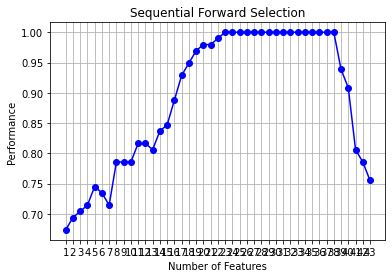

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
nova_matriz_features = df[["feature_names","avg_score"]].query("avg_score >= 0.95").min()

In [ ]:
#X.loc[nova_matriz_features["feature_names"]]
#nova_matriz_features["feature_names"]
novo_X = pd.DataFrame(columns=nova_matriz_features["feature_names"])

In [ ]:
for feat in novo_X:
    novo_X[feat] = dataset[feat]

In [ ]:
novo_dataset = novo_X
novo_dataset['gravidade'] = y

In [ ]:
inicio = time.time()
rodadas_1 = 14
rodadas_2 = 7
pontos_qda = []            
qda = QuadraticDiscriminantAnalysis()
Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(novo_dataset, rodadas_1)       
for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
    qda.fit(X_treino, y_treino)
    y_prev = qda.predict(X_teste)
    pontuacao = accuracy_score(y_teste, y_prev)
    pontos_qda.append(pontuacao)
Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(novo_dataset, rodadas_2)
for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
    qda.fit(X_treino, y_treino)
    y_prev = qda.predict(X_teste)
    pontuacao = accuracy_score(y_teste, y_prev)
    pontos_qda.append(pontuacao)
print(f"Média de Acurácia = {np.mean(pontos_qda)}")

print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))

Média de Acurácia = 0.697278911564626
Tempo decorrido: 0min


In [ ]:
inicio = time.time()
rodadas_1 = 14
rodadas_2 = 7
pontos_qda = []            
qda = QuadraticDiscriminantAnalysis()
Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(dataset, rodadas_1)       
for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
    qda.fit(X_treino, y_treino)
    y_prev = qda.predict(X_teste)
    pontuacao = accuracy_score(y_teste, y_prev)
    pontos_qda.append(pontuacao)
Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(dataset, rodadas_2)
for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
    qda.fit(X_treino, y_treino)
    y_prev = qda.predict(X_teste)
    pontuacao = accuracy_score(y_teste, y_prev)
    pontos_qda.append(pontuacao)
print(f"Média de Acurácia = {np.mean(pontos_qda)}")

print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))

Média de Acurácia = 0.6632653061224489
Tempo decorrido: 0min


# **Comparação de Melhores Algoritmos - Com Feature Selection**

In [ ]:
melhores = [
        SVC(gamma='auto'),
        #KNeighborsClassifier(),
       # LogisticRegression(solver='lbfgs'), 
        ExtraTreesClassifier(n_estimators=300),
        QuadraticDiscriminantAnalysis(),
        #OneVsRestClassifier(LinearSVC(random_state=0, dual=False)), #multiclass
    ]


In [ ]:
def FS(model, bancoDados):
    X = dataset.iloc[:,1:-1]
    y = dataset["gravidade"]
    #feature_names = tuple(X.columns)
    fs = SFS(#SVC(gamma='auto', max_iter=1000),
           model,
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=0,
           scoring='accuracy',  # sklearn classifiers
           cv=0)

    backwardFS = fs.fit(X, y)#,custom_feature_names=feature_names)
    df = pd.DataFrame.from_dict(backwardFS.get_metric_dict()).T
    nova_matriz_features = df[["feature_names","avg_score"]].query("avg_score >= 0.95").min()
    novo_X = pd.DataFrame(columns=nova_matriz_features["feature_names"])
    for feat in novo_X:
        novo_X[feat] = dataset[feat]
    novo_dataset = novo_X
    novo_dataset['gravidade'] = y
    
    return novo_dataset


In [ ]:
def geralFSdeixaUmFora(bancoDados, MT, modelos):
  resultado_final = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1'])
  f1 = []
  acuracia = []
  algoritmos = []
  rodadas_1 = 7
  rodadas_2 = 14
  inicio = time.time()
  for modelo in modelos:
    algoritmos.append(modelo.__class__.__name__)
    print(f"Algoritmo {modelo.__class__.__name__}")
    acur = []
    f1score = []
    novoBancoDados = FS(modelo, bancoDados) 
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(novoBancoDados, rodadas_1)
    #print(f"Xs Treino = {Xs_treino.shape} e y_treino = {ys_teste.shape}")
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(novoBancoDados, rodadas_2)
    #print(f"Xs Treino = {Xs_treino.shape} e y_treino = {ys_teste.shape}")
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
    acuracia.append(np.mean(acur))
    print(f"Acurácia= {np.mean(acur)}")
    f1.append(np.mean(f1score))
    print(f"F1-score= {np.mean(f1score)}")
  resultado_final['algoritmo'] = algoritmos 
  resultado_final['acurácia'] = acuracia
  resultado_final['f1'] = f1
  #print(f"Média de Acurácia para o modelo {modelo.__class__.__name__}= é {np.mean(pontos)}")
  print('Tempo decorrido Total: {:.0f}s'.format((time.time() - inicio)))
  return resultado_final

In [ ]:
MT_FS = MultiTeste()
fs_1_fora = geralFSdeixaUmFora(dataset, MT_FS, melhores)

Algoritmo SVC
Acurácia= 0.6530612244897961
F1-score= 0.7747414582197191
Algoritmo ExtraTreesClassifier
Acurácia= 0.5714285714285714
F1-score= 0.6864622612098719
Algoritmo QuadraticDiscriminantAnalysis
Acurácia= 0.7040816326530611
F1-score= 0.7897940155083012
Tempo decorrido Total: 340s


In [ ]:
print("Acurácia")
ordenada = MT2.OrdenaMetrica(fs_1_fora,'acurácia',"sim")
print(ordenada)

Acurácia
                       algoritmo  acurácia        f1
0  QuadraticDiscriminantAnalysis  0.704082  0.789794
1                            SVC  0.653061  0.774741
2           ExtraTreesClassifier  0.571429  0.686462
